In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv("train_final.csv")
test=pd.read_csv("test_final.csv")

In [6]:
train.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [7]:
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


In [8]:
print(train.shape,test.shape)

(44638, 29) (23525, 28)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23525 entries, 0 to 23524
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23525 non-null  object 
 1   lead_time                       23525 non-null  int64  
 2   arrival_date_year               23525 non-null  int64  
 3   arrival_date_month              23525 non-null  object 
 4   arrival_date_week_number        23525 non-null  int64  
 5   arrival_date_day_of_month       23525 non-null  int64  
 6   stays_in_weekend_nights         23525 non-null  int64  
 7   stays_in_week_nights            23525 non-null  int64  
 8   adults                          23525 non-null  int64  
 9   children                        23525 non-null  float64
 10  babies                          23525 non-null  int64  
 11  meal                            23525 non-null  object 
 12  country                         

In [11]:
print(train.isna().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
print(test.isna().sum())

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

In [14]:
train["is_canceled"].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

In [15]:
train.loc[:,train.dtypes=="object"]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [16]:
train = train.drop(columns=["reservation_status_date","country","reserved_room_type","assigned_room_type"])
test=test.drop(columns=["reservation_status_date","country","reserved_room_type","assigned_room_type"])

In [17]:
train.loc[:,train.dtypes=="object"]

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type
0,Resort Hotel,February,BB,Direct,Direct,No Deposit,Transient
1,City Hotel,November,BB,Online TA,TA/TO,No Deposit,Transient
2,City Hotel,September,BB,Online TA,TA/TO,No Deposit,Contract
3,City Hotel,December,BB,Online TA,TA/TO,No Deposit,Transient
4,City Hotel,September,BB,Online TA,TA/TO,No Deposit,Transient
...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,Online TA,TA/TO,No Deposit,Transient
44634,Resort Hotel,September,BB,Online TA,TA/TO,No Deposit,Transient
44635,City Hotel,April,SC,Online TA,TA/TO,No Deposit,Transient
44636,City Hotel,September,HB,Offline TA/TO,TA/TO,No Deposit,Transient-Party


In [19]:
#закодируем данные
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train['arrival_date_month'])

train['arrival_date_month'] = label_encoder.transform(train['arrival_date_month'])
test['arrival_date_month'] = label_encoder.transform(test['arrival_date_month'])

In [20]:
categ = train.loc[:, train.dtypes=='object'].columns
categ

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'deposit_type', 'customer_type'],
      dtype='object')

In [21]:
categ = ['hotel', 'meal', 'market_segment', 'distribution_channel']
for i in categ:
    label_encoder = LabelEncoder()

    label_encoder.fit(train[i])

    train[i] = label_encoder.transform(train[i])
    test[i] = label_encoder.transform(test[i])


In [22]:
train.loc[:,train.dtypes == 'object']

,deposit_type,customer_type
0,No Deposit,Transient
1,No Deposit,Transient
2,No Deposit,Contract
3,No Deposit,Transient
4,No Deposit,Transient
...,...,...
44633,No Deposit,Transient
44634,No Deposit,Transient
44635,No Deposit,Transient
44636,No Deposit,Transient-Party


In [23]:
#закодируем данные через дамми-переменные
train = pd.get_dummies(train, columns=['deposit_type', 'customer_type'])
test = pd.get_dummies(test, columns=['deposit_type', 'customer_type'])

In [24]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,3,2016,3,7,12,0,2,2,...,81.0,1,0,1,0,0,0,0,1,0
1,0,1,50,2016,9,47,18,1,2,2,...,93.6,0,2,1,0,0,0,0,1,0
2,0,0,14,2015,11,37,7,1,5,2,...,166.0,0,3,1,0,0,1,0,0,0
3,0,0,18,2015,2,50,6,2,0,2,...,107.0,0,0,1,0,0,0,0,1,0
4,0,1,263,2016,11,40,29,2,4,2,...,100.3,0,0,1,0,0,0,0,1,0


In [27]:
train.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
deposit_type_No Deposit           

In [29]:
X=train.drop(columns=["is_canceled"])
y=train["is_canceled"]

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)
pred=model.predict(X)

C:\Users\Msi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(pred,y))
print(precision_score(pred,y))
print(recall_score(pred,y))


0.7989381244679421
0.4506172839506173
0.7811562051415895


C:\Users\Msi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


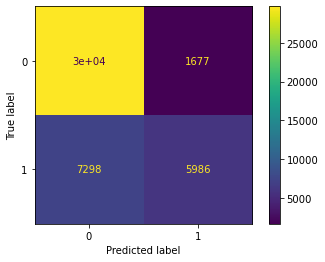

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X, y)
plt.show()

In [34]:
test_pred = model.predict(test)
test_pred=pd.DataFrame(test_pred,columns=["is_canceled"])
test_pred=test_pred.reset_index()
test_pred.to_csv('solution.csv', index=False)